<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/4_4_cats_and_dogs_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [ ]:
# 압축 파일의 위치
drive_path = "/content/drive/MyDrive/Colab Notebooks/github/DL-self-study/tensorflow/"
source_filname = drive_path + "data/cat-and-dog.zip"

# 저장 경로
extract_folder = "data/"      # 코랩 환경에 임시 저장(구글 드라이브 통해 읽어오고 저장하는 속도가 매우 느리므로)

# 압축 해제
shutil.unpack_archive(source_filname, extract_folder)

# 훈련, 검증 셋 저장 위치 지정
train_dir = extract_folder + "training_set/training_set"
valid_dir = extract_folder + "test_set/test_set"
print(train_dir)
print(valid_dir)

data/training_set/training_set
data/test_set/test_set


# 모델 학습

In [ ]:
# 이미지 데이터 제너레이터 정의(Augmentation 미적용)
image_gen = ImageDataGenerator(rescale=(1/255.))        # 각 픽셀의 값을 0~1 범위로 정규화
print(image_gen)

# flow_from_directory 함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정리
train_gen = image_gen.flow_from_directory(train_dir,
                                          batch_size = 32,
                                          target_size = (224, 224),
                                          classes = ['cats', 'dogs'],
                                          class_mode = 'binary',
                                          seed = 2020)

valid_gen = image_gen.flow_from_directory(valid_dir,
                                          batch_size = 32,
                                          target_size = (224, 224),
                                          classes = ['cats', 'dogs'],
                                          class_mode = 'binary',
                                          seed = 2020)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


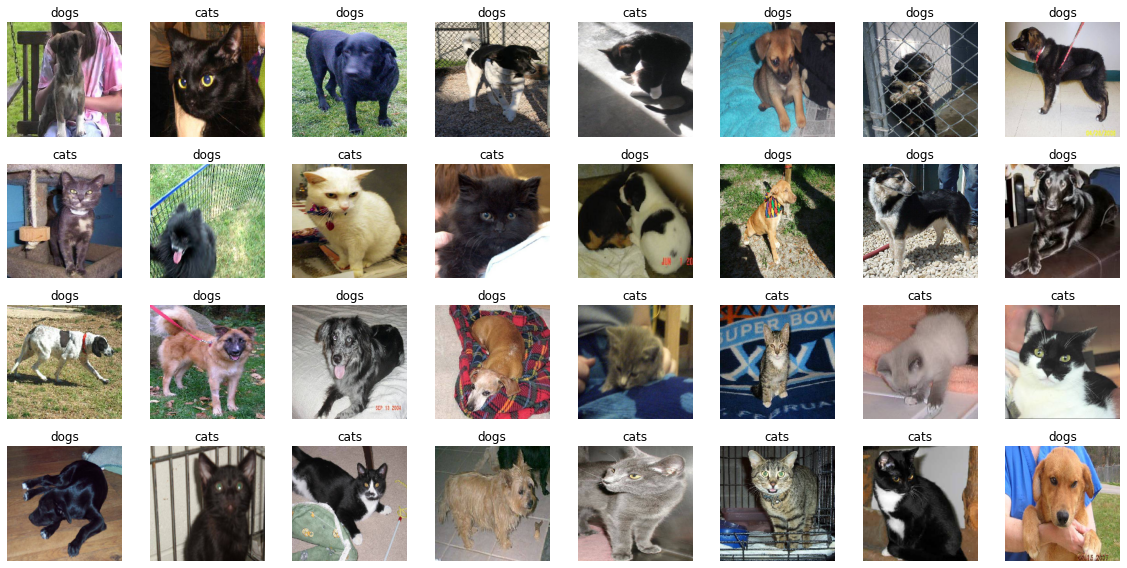

In [ ]:
# sample image 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))
for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Sequential API를 사용하여 샘플 모델 생성
def build_model():

    model = tf.keras.Sequential([

        # Convolution 층 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Classifier 출력층 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.Dropout(0.3),              
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    return model

model = build_model()

In [ ]:
# 모델 컴파일
model.compile(optimizer=tf.optimizers.Adam(lr=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 49s 189ms/step - loss: 1.6446 - accuracy: 0.5542 - val_loss: 0.6807 - val_accuracy: 0.5690
Epoch 2/20
251/251 [==============================] - 48s 191ms/step - loss: 0.6560 - accuracy: 0.6255 - val_loss: 0.6551 - val_accuracy: 0.6164
Epoch 3/20
251/251 [==============================] - 46s 182ms/step - loss: 0.6684 - accuracy: 0.6004 - val_loss: 0.6676 - val_accuracy: 0.6446
Epoch 4/20
251/251 [==============================] - 45s 180ms/step - loss: 0.6498 - accuracy: 0.6427 - val_loss: 0.6358 - val_accuracy: 0.6817
Epoch 5/20
251/251 [==============================] - 46s 183ms/step - loss: 0.6313 - accuracy: 0.6573 - val_loss: 0.6438 - val_accuracy: 0.6352
Epoch 6/20
251/251 [==============================] - 45s 180ms/step - loss: 0.6176 - accuracy: 0.6626 - val_loss: 0.6019 - val_accuracy: 0.7039
Epoch 7/20
251/251 [==============================] - 45s 180ms/step - loss: 0.6123 - accuracy: 0.6813 - val_loss: 0.5923 - val_accuracy: 0.7

(check)
training set에 대한 acc는 89%, validation set에 대한 acc는 77% 수준으로 과대적합이 발생하였음.

In [ ]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

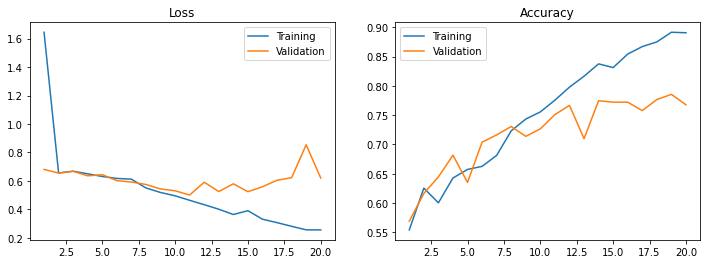

In [ ]:
plot_loss_acc(history, 20)

ImageDataGenerator를 사용하면 다양한 데이터 증강 기법을 클래스 함수의 매개변수 속성으로 지정할 수 있어 편리하다는 장점이 있음.

In [ ]:
## 참고)GPU 환경에서 돌리면 훨씬 빠름!

# 이미지 데이터 제너레이터 정의 (Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale=1/255., 
                                   horizontal_flip=True,      # 좌우 방향 뒤집기
                                   rotation_range=35,            # 최대 35도 회전                     
                                   zoom_range=0.2)          # 줌으로 확대

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리 
train_gen_aug = image_gen_aug.flow_from_directory(train_dir, 
                                                  batch_size=32, 
                                                  target_size=(224,224),   
                                                  classes=['cats','dogs'], 
                                                  class_mode = 'binary', 
                                                  seed=2020)

valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,  
                                                  batch_size=32, 
                                                  target_size=(224,224),   
                                                  classes=['cats','dogs'], 
                                                  class_mode = 'binary', 
                                                  seed=2020)

# 모델 생성
model_aug = build_model()

# 모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(lr=0.001),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# 모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data=valid_gen_aug, epochs=40)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 143s 566ms/step - loss: 1.6913 - accuracy: 0.6107 - val_loss: 0.7143 - val_accuracy: 0.5190
Epoch 2/40
251/251 [==============================] - 142s 564ms/step - loss: 0.6163 - accuracy: 0.6587 - val_loss: 0.6282 - val_accuracy: 0.6441
Epoch 3/40
251/251 [==============================] - 142s 565ms/step - loss: 0.6075 - accuracy: 0.6648 - val_loss: 0.6290 - val_accuracy: 0.6303
Epoch 4/40
251/251 [==============================] - 143s 569ms/step - loss: 0.5944 - accuracy: 0.6740 - val_loss: 0.5704 - val_accuracy: 0.6980
Epoch 5/40
251/251 [==============================] - 145s 578ms/step - loss: 0.5838 - accuracy: 0.6908 - val_loss: 0.5520 - val_accuracy: 0.7088
Epoch 6/40
251/251 [==============================] - 141s 562ms/step - loss: 0.5728 - accuracy: 0.6944 - val_loss: 0.5630 - val_accuracy: 0.7059
Epoch 7/40
251/251 [==============================] - 141s 562ms/step - loss: 0.5622 - accuracy: 0.7071 - val_loss: 0.5711 - val_accura

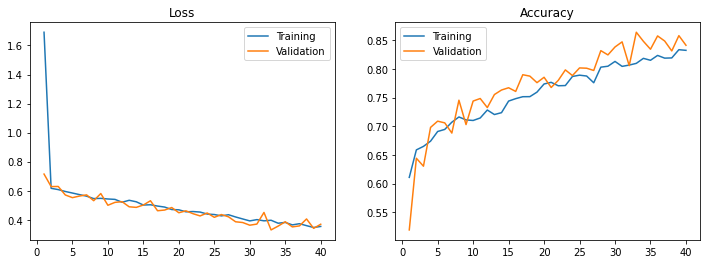

In [ ]:
# 손실함수, 정확도 그래프 그리기 
plot_loss_acc(history_aug, 40)

과대적합 또는 과소적합이 거의 발생하지 않고 학습이 잘 진행되는 것을 확인 가능. epoch를 더 늘려서 시도할 여지가 있음.